[View in Colaboratory](https://colab.research.google.com/github/gurudave/so_examples/blob/master/mpl_animation.ipynb)

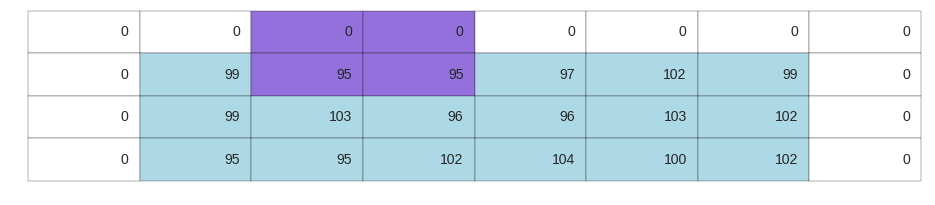

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import six

width = 8
data = pd.DataFrame([[0]*width,
                     [0, *np.random.randint(95,105,size=width-2), 0],
                     [0, *np.random.randint(95,105,size=width-2), 0],
                     [0, *np.random.randint(95,105,size=width-2), 0]])

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     row_color="w", edge_color="black", bbox=[0, 0, 1, 1],
                     ax=None, col_labels=data.columns, highlight_color="mediumpurple",
                     highlights=[], **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=col_labels, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k in highlights:
            cell.set_facecolor(highlight_color)
        elif data.iat[k] > 0:
            cell.set_facecolor("lightblue")
        else:
            cell.set_facecolor(row_color)
    return fig, ax, mpl_table

fig, ax, mpl_table = render_mpl_table(data, col_width=2.0, col_labels=None,
                                      highlights=[(0,2),(0,3),(1,2),(1,3)])

In [0]:
def update_table(i, *args, **kwargs):
    r = i//(width-1)
    c = i%(width-1)
    highlights=[(r,c),(r,c+1),(r+1,c),(r+1,c+1)]
    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor("black")
        if k in highlights:
            cell.set_facecolor("mediumpurple")
        elif data.iat[k] > 0:
            cell.set_facecolor("lightblue")
        else:
            cell.set_facecolor("white")
    return (mpl_table,)

a = animation.FuncAnimation(fig, update_table, (width-1)*3,
                                   interval=750, blit=True)

In [3]:
HTML(a.to_jshtml())